### The data for this notebook can be found here:

https://www.kaggle.com/unsdsn/world-happiness

# This notebook is an exercise and Exploration into Data Agrregation.
#### In this notebook I will work with data from from two different datasets and combine, merge and perform various statistical and plotting functions with them. This is an expansion on the lesson from the Dataquest mission on the subject. I felt I needed to do some more work to truly understand this important topic of data analysis and manipulation before I could move on to the next lessons.

# Basic libraries for the work ahead

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Read in the datasets we want to work with

In [7]:
df_2015 = pd.read_csv(r'C:\Users\emack\Documents\Sandbox\world-happiness\2015.csv')
df_2016 = pd.read_csv(r'C:\Users\emack\Documents\Sandbox\world-happiness\2016.csv')

### Get some info about the datasets and do some basic cleanup.

In [10]:
print('The 2015 dataset has ', df_2015.shape, 'rows and columns respectively.')
print('The 2016 dataset has ', df_2016.shape, 'rows and columns respectively.')

The 2015 dataset has  (158, 12) rows and columns respectively.
The 2016 dataset has  (157, 13) rows and columns respectively.


### Check for null entries

In [11]:
df_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [12]:
df_2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### From the output above it looks like the data is pretty clean with no NaN's. 

### Let's get some information about the data types in each column, (i.e.) float, date, text, etc.

In [14]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [15]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.1+ KB


### From the output above it looks like most of the rows are float64 except for the 'Country' and 'Region' columns wich are 'object' data types likely strings. 

At this point it seems like we don't need to do anything with the data so let's beging some aggregation work.

### The plot below shows why I need to pull the data together in a more usefull way.

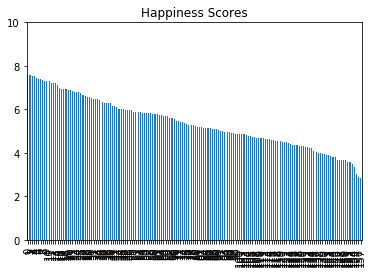

In [19]:
df_2015['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(0,10))

plt.show()

The bar chart above is pretty hard to read as every happiness score is plotted out and the country names all run together. Let's start fixing the problem. Let's take a look at the scores arranged by specific world regions of observation.

In [41]:
region_unique = df_2015['Region'].unique() #get the number of unique region names
print(region_unique)
#get a count of the number of unique regions
print('\nThere are ', len(region_unique), 'unique regions referenced in the dataset.') 

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']

There are  10 unique regions referenced in the dataset.


### Let's plot the scores by region and see if it's easier to understand the data

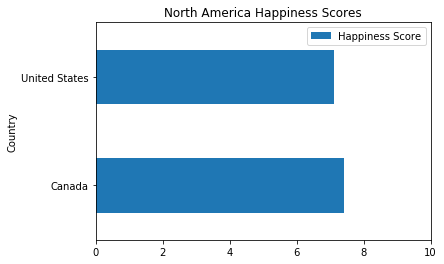

In [46]:
nor_america = df_2015[df_2015['Region'] == 'North America'] #boolean filter to isolote just the north american scores
nor_america.plot(x='Country', y='Happiness Score', kind='barh', title='North America Happiness Scores', xlim=(0,10))

plt.show()

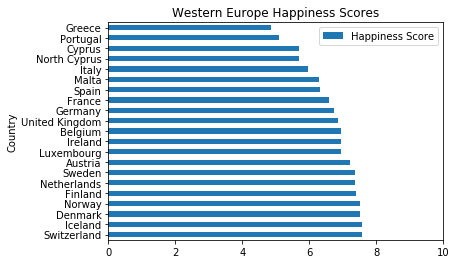

In [45]:
wes_europe = df_2015[df_2015['Region'] == 'Western Europe'] #boolean filter to isolote just the Western Europe scores
wes_europe.plot(x='Country', y='Happiness Score', kind='barh', title='Western Europe Happiness Scores', xlim=(0,10))

plt.show()

#### From the two plots above we can clearly understand the relationship between countries by reqion and the happiness scores for those regions. Basically we performed the following above:

* Split the dataframe into groups using a boolean filter that relates to the area of interest in my investigation.

* Combine the results into one data structure-the 'wes_europe' dataframe in this case.

* Next I can apply a function to the new, more narrowly focused dataframe.



## This is the purely Python method of grouping and aggregating. Let's check it out just so I know how it works.

In [94]:
mean_happiness = {}
regions = df_2015['Region'].unique()

for region in regions:
    #1. Split the dataframe into groups.
    region_group = df_2015[df_2015['Region'] == region]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[region] = region_mean

### Because matplotlib can't directly plot a dictionary object I will convert it to two different lists to plot on the x and y of my bar plot

In [105]:
#use the .item() function to create a new 'view' of the dictionary for iteration
#see: https://docs.python.org/3.8/library/stdtypes.html#dict-views

item_key = []
item_value = []

for item in mean_happiness.items(): #use the .items() function and iterate through the dictionary
    item_key.append(item[0]) #save the dictionary key for the x axis
    item_value.append(item[1]) #save the dictionary value for the y axis


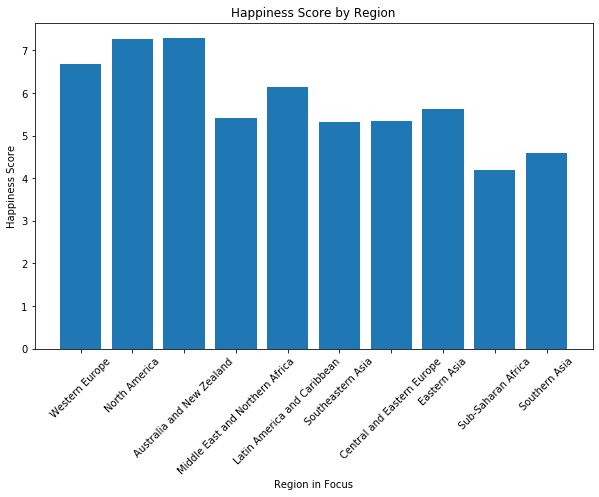

In [109]:
# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel('Region in Focus')
plt.ylabel('Happiness Score')
plt.title('Happiness Score by Region')

# Create bar plot
ax.bar(item_key, item_value)

plt.show()